In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import Flatten
from keras.metrics import Precision, Recall, F1Score
from keras.callbacks import EarlyStopping
from keras.backend import clear_session
from keras.utils import to_categorical

from IPython.display import SVG

**Loading data**

In [49]:
df = pd.read_csv("../data/weather_data_combined.csv")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16900 entries, 0 to 16899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            16900 non-null  int64  
 1   Temperature          16900 non-null  float64
 2   Feels Like           16900 non-null  float64
 3   Temp Min             16900 non-null  float64
 4   Temp Max             16900 non-null  float64
 5   Pressure             16900 non-null  int64  
 6   Humidity             16900 non-null  int64  
 7   Weather Description  16900 non-null  object 
 8   Wind Speed           16900 non-null  float64
 9   Wind Degree          16900 non-null  int64  
 10  City                 16900 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 1.4+ MB


,Timestamp,Temperature,Feels Like,Temp Min,Temp Max,Pressure,Humidity,Weather Description,Wind Speed,Wind Degree,City
0,1699542000,285.12,284.25,280.22,288.73,1011,72,overcast clouds,5.36,360,United States-New York City
1,1699545600,285.33,284.43,281.12,289.25,1011,70,overcast clouds,2.57,0,United States-New York City
2,1699549200,285.77,284.89,282.10,289.28,1010,69,overcast clouds,4.02,41,United States-New York City
3,1699552800,286.35,285.55,284.12,288.80,1009,70,broken clouds,4.63,270,United States-New York City
4,1699556400,286.98,286.19,285.34,289.13,1009,68,broken clouds,2.57,260,United States-New York City


# Preprocessing data

In [17]:
#df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Timestamp'] = df['Timestamp'].astype('int64')/1e9
lb = LabelEncoder()
df['Weather Description'] = lb.fit_transform(df['Weather Description'])

In [18]:
# Split the data
X = df.drop(['Weather Description', 'City', 'Timestamp'], axis=1)
y = df['Weather Description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')

Accuracy: 0.5911242603550296
Precision: 0.5568519420771887
Recall: 0.5911242603550296
F1 Score: 0.5506193664397109
Confusion Matrix: 
[[ 167  176    0   20    1    1    0    0    0    0    9    0   50   22
     1    0    0    0    0]
 [  43 1447    0   60    2    2    0    0    0    0   13    0   23   20
     0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    1
     0    0    0    0    0]
 [  45  273    0   95    1    3    0    0    0    0    1    0   10   26
     0    0    0    0    0]
 [   1   25    0    0   10    1    0    0    0    0    8    0    1    1
     0    1    0    0    0]
 [   6   24    0    4    0   13    0    0    0    0    2    0    2    2
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    1    1    0
     0    0    0    0    0]
 [   1    3    0    0    0    0    0    0    0    0    1    0    3    0
     0    0    0    0    0]
 [   7    3    0    0    0    0    0    0   18    0    3    0    7

# Logistic Regression model

In [7]:
model = LogisticRegression(solver='liblinear', multi_class='auto')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')

              precision    recall  f1-score   support

           0       0.41      0.13      0.20       447
           1       0.52      0.97      0.68      1610
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00       454
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         8
          10       0.50      0.03      0.05        39
          11       0.00      0.00      0.00         1
          12       0.36      0.09      0.15        98
          13       0.00      0.00      0.00        20
          14       0.32      0.20      0.24       311
          15       0.00      0.00      0.00       255
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00        18
          19       0.00    

# K-Nearest Neighbors model

In [8]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Create DataFrame for KNN metrics
metrics_df_knn = pd.DataFrame({
    'Accuracy': [accuracy_knn],
    'Precision': [precision_knn],
    'Recall': [recall_knn],
    'F1 Score': [f1_knn]
})

# Print KNN metrics
print("Metrics (KNN):")
print(metrics_df_knn)

# Create DataFrame for KNN confusion matrix
cm_df_knn = pd.DataFrame(cm_knn, index=np.unique(y_test), columns=np.unique(y_test))

# Print KNN confusion matrix
print("\nConfusion Matrix (KNN):")
print(cm_df_knn)

Metrics (KNN):
   Accuracy  Precision    Recall  F1 Score
0  0.495858   0.447301  0.495858   0.45792

Confusion Matrix (KNN):
     0     1   3   4   5   6   7   8   10  11  12  13  14  15  16  17  18  19  \
0   132   196   0  48   3   4   0   0   1   0   9   0  42  12   0   0   0   0   
1   137  1293   0  89   7   7   0   0   1   0   8   0  36  30   0   2   0   0   
3     0     1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
4    55   271   0  88   2   7   0   0   0   0   4   0  12  15   0   0   0   0   
5     5    23   0   1   8   1   0   0   1   0   7   0   2   0   0   0   0   0   
6     5    26   0   7   0   8   0   0   0   0   3   0   4   0   0   0   0   0   
7     1     0   0   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   
8     2     4   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
10    6     8   0   2   0   0   0   0  14   0   2   0   4   3   0   0   0   0   
11    0     1   0   0   0   0   0   0   0   0   0   0   0   0   

# SVM model

In [9]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Create an SVM model
model = SVC(kernel='linear', C=1.0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')

              precision    recall  f1-score   support

           0       0.42      0.15      0.22       447
           1       0.53      0.97      0.69      1610
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00       454
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         8
          10       0.85      0.28      0.42        39
          11       0.00      0.00      0.00         1
          12       0.24      0.12      0.16        98
          13       0.00      0.00      0.00        20
          14       0.29      0.23      0.26       311
          15       0.00      0.00      0.00       255
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00        18
          19       0.00    

# Neuron Network model

In [3]:
# Xác định cột chứa văn bản
text_column = 'Weather Description'

# Lấy ra toàn bộ văn bản từ cột
all_text = df[text_column].astype(str).values

# Khởi tạo Tokenizer và fit trên dữ liệu
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_text)

# Xác định max_vocab_size dựa trên số từ vựng trong tokenizer
max_vocab_size = len(tokenizer.word_index)
print("Max Vocab Size:", max_vocab_size)

Max Vocab Size: 21


In [4]:
# Đọc dữ liệu từ file hoặc nguồn dữ liệu khác
# df = pd.read_csv('your_data.csv')

# Xác định cột chứa văn bản
text_column = 'Weather Description'

# Lấy giá trị và số lần xuất hiện của chúng
word_counts = df[text_column].value_counts()

# In ra một số giá trị đầu tiên
print(word_counts.head())


Weather Description
clear sky           7344
overcast clouds     3710
broken clouds       2018
few clouds          1380
scattered clouds    1028
Name: count, dtype: int64


## 1. Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation:

In [82]:
# Assuming you have a 'text' column and a 'weather' column in your DataFrame
X_text = df['Weather Description'].astype(str).values  # Convert to string
# Convert labels to numerical values
le = LabelEncoder()
y = le.fit_transform(df['Weather Description'])

# Tokenize the text data
max_vocab_size = 21  # Adjust as needed
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_text)
X_text = tokenizer.texts_to_sequences(X_text)

# Pad sequences to a fixed length
max_len = max(len(seq) for seq in X_text)
X_text = pad_sequences(X_text, maxlen=max_len)

# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
X_train, X_temp, y_train, y_temp = train_test_split(X_text, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## 2. Xây dựng và huấn luyện mô hình trên tập huấn luyện và đánh giá trên tập validation:

Epoch 1/10
423/423 [==============================] - 0s 670us/step - loss: 0.7255 - accuracy: 0.8783 - val_loss: 0.0744 - val_accuracy: 0.9840
Epoch 2/10
423/423 [==============================] - 0s 532us/step - loss: 0.0474 - accuracy: 0.9902 - val_loss: 0.0260 - val_accuracy: 0.9941
Epoch 3/10
423/423 [==============================] - 0s 553us/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0158 - val_accuracy: 0.9947
Epoch 4/10
423/423 [==============================] - 0s 546us/step - loss: 0.0123 - accuracy: 0.9976 - val_loss: 0.0093 - val_accuracy: 0.9982
Epoch 5/10
423/423 [==============================] - 0s 544us/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.0059 - val_accuracy: 0.9982
Epoch 6/10
423/423 [==============================] - 0s 547us/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9988
Epoch 7/10
423/423 [==============================] - 0s 528us/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy:

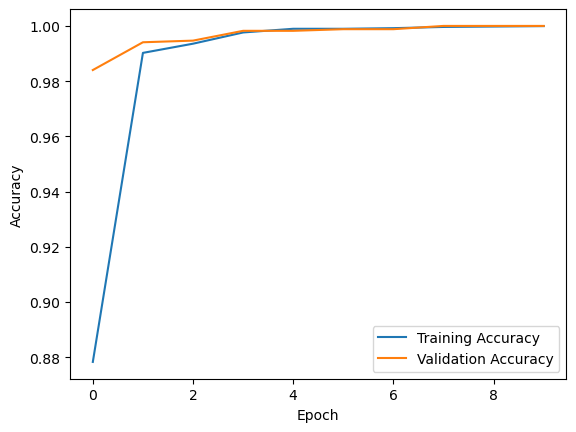

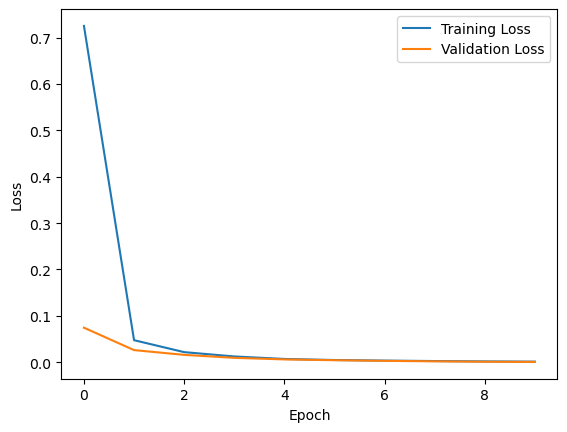

53/53 [==============================] - 0s 435us/step


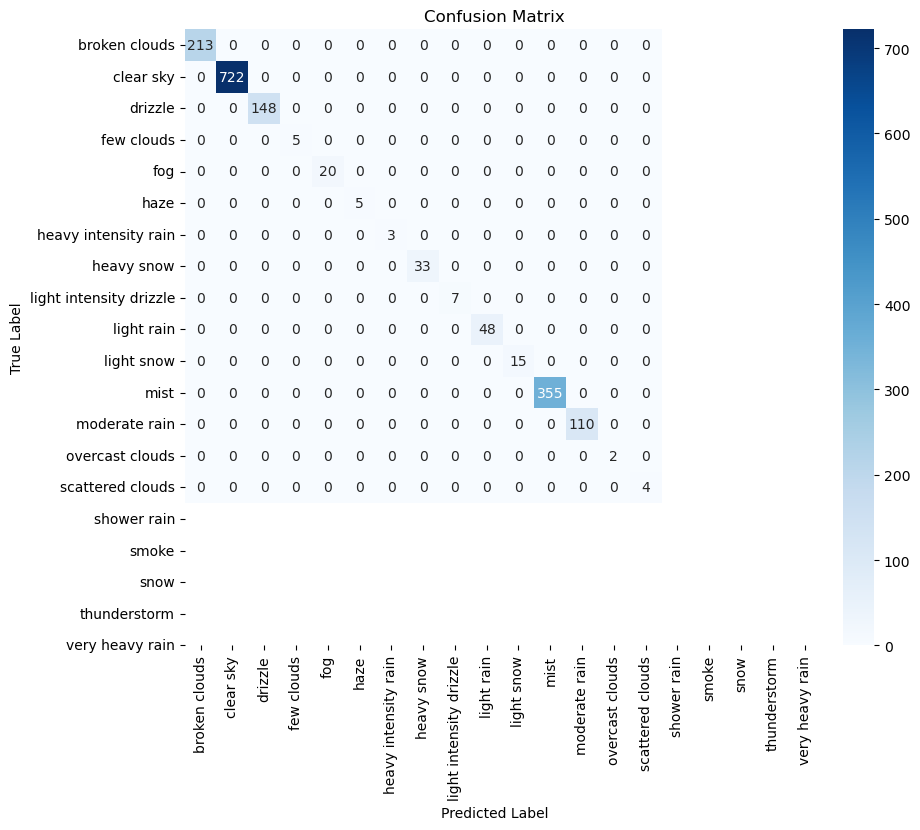

In [83]:
# Xây dựng mô hình
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))

# Biên soạn mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình trên tập huấn luyện và đánh giá trên tập validation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Biểu đồ accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự đoán trên tập kiểm thử
y_probabilities = model.predict(X_test)
y_pred = np.argmax(y_probabilities, axis=1)

# Tính ma trận confusion
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận confusion bằng seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 3. Điều chỉnh hyperparameters dựa trên đánh giá trên tập validation:

Dựa vào kết quả huấn luyện và đánh giá trên tập validation, mô hình đã cho thấy hiệu suất rất tốt với độ chính xác lên đến 99.99% trên tập validation. Dưới đây là một số điều nhóm đề xuất để điều chỉnh hyperparameters:

**Số lượng epochs:**
Dựa vào kết quả, mô hình có vẻ đã hội tụ khá nhanh với số lượng epochs tương đối ít.
Nhóm nhận thấy có thể thử giảm số lượng epochs hoặc sử dụng early stopping để ngừng huấn luyện khi không có cải thiện đáng kể.

**Batch size:**
Batch size hiện đang là 32. Nhóm dự định thử nghiệm các giá trị khác nhau để xem liệu có sự thay đổi nào không.

**Kích thước embedding (embedding_dim):**
Nhóm em đã sử dụng embedding_dim = 50, có thể thử các giá trị khác nhau, ví dụ như 32, 64, 128, để xem liệu có sự cải thiện nào không.

**Tăng cường dữ liệu (Data Augmentation):**
có thể thử tăng cường dữ liệu để cải thiện khả năng tổng quát hóa của mô hình.

**Dropout:**
Thêm dropout layer để giảm overfitting.

**Learning rate:**
Thử điều chỉnh learning rate.

Epoch 1/10
423/423 [==============================] - 0s 804us/step - loss: 0.4272 - accuracy: 0.9186 - val_loss: 0.0202 - val_accuracy: 0.9941
Epoch 2/10
423/423 [==============================] - 0s 695us/step - loss: 0.0171 - accuracy: 0.9970 - val_loss: 0.0057 - val_accuracy: 0.9982
Epoch 3/10
423/423 [==============================] - 0s 714us/step - loss: 0.0070 - accuracy: 0.9990 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 4/10
423/423 [==============================] - 0s 688us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 8.5604e-04 - val_accuracy: 1.0000
Epoch 5/10
423/423 [==============================] - 0s 704us/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 2.8730e-04 - val_accuracy: 1.0000
Epoch 6/10
423/423 [==============================] - 0s 692us/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 1.7796e-04 - val_accuracy: 1.0000
Epoch 7/10
423/423 [==============================] - 0s 677us/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 3.0648e-04

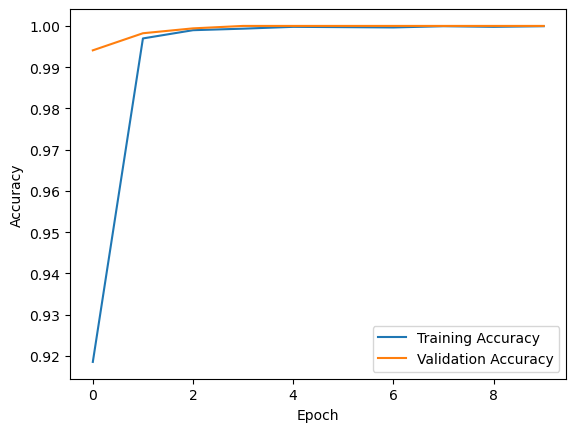

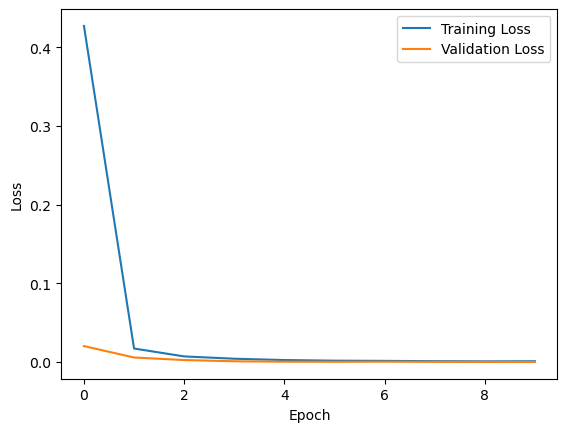

In [84]:
# Xây dựng mô hình
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Thêm Dropout Layer để giảm overfitting
model.add(Dense(len(le.classes_), activation='softmax'))

# Biên soạn mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping để ngừng huấn luyện khi không có cải thiện trên tập validation
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Huấn luyện mô hình trên tập huấn luyện và đánh giá trên tập validation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Biểu đồ accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4. Re-train mô hình trên (tập huấn luyện + tập validation)

Epoch 1/5
423/423 [==============================] - 0s 775us/step - loss: 4.6108e-04 - accuracy: 0.9999 - val_loss: 1.7906e-05 - val_accuracy: 1.0000
Epoch 2/5
423/423 [==============================] - 0s 718us/step - loss: 3.2694e-04 - accuracy: 0.9999 - val_loss: 1.2485e-05 - val_accuracy: 1.0000
Epoch 3/5
423/423 [==============================] - 0s 689us/step - loss: 2.2311e-04 - accuracy: 1.0000 - val_loss: 6.8606e-06 - val_accuracy: 1.0000
Epoch 4/5
423/423 [==============================] - 0s 686us/step - loss: 1.3291e-04 - accuracy: 1.0000 - val_loss: 2.9741e-06 - val_accuracy: 1.0000
Epoch 5/5
423/423 [==============================] - 0s 707us/step - loss: 1.0348e-04 - accuracy: 1.0000 - val_loss: 1.5369e-06 - val_accuracy: 1.0000


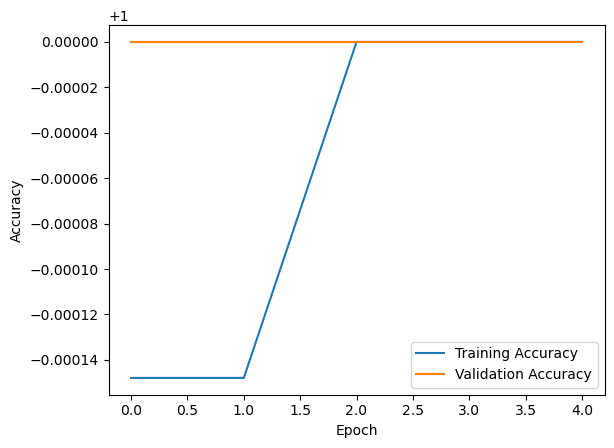

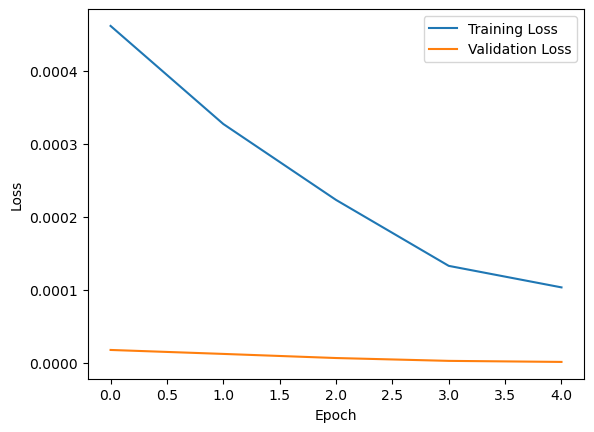

In [85]:
best_epochs = 5  
best_batch_size = 32  

X_train_final = np.concatenate((X_train, X_val))
y_train_final = np.concatenate((y_train, y_val))

# model.fit(X_train_final, y_train_final, epochs=best_epochs, batch_size=best_batch_size)
history = model.fit(X_train, y_train, epochs=best_epochs, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Biểu đồ accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 5. Đánh giá mô hình cuối cùng trên tập kiểm tra

In [86]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

53/53 [==============================] - 0s 488us/step - loss: 1.2502e-06 - accuracy: 1.0000
Test Loss: 0.0000
Test Accuracy: 1.0000


In [87]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

53/53 [==============================] - 0s 455us/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [88]:
from sklearn.metrics import classification_report

# Generate classification report
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Use the unique classes in the testing set
num_classes = len(np.unique(y_test))
print(classification_report(y_test, y_pred_class, target_names=[str(i) for i in range(num_classes)]))



53/53 [==============================] - 0s 450us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       722
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00       355
          12       1.00      1.00      1.00       110
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4

    accuracy                           1.00      1690
   macro avg       1.00  

In [95]:
# Đọc file dữ liệu mới
new_data = pd.read_csv("../data/weather_data_combined_forecast.csv")

X_new_text = df_new['Weather Description'].astype(str).values

# Tokenization và Padding
X_new_text = tokenizer.texts_to_sequences(X_new_text)
X_new_text = pad_sequences(X_new_text, maxlen=max_len)

# Dự đoán Weather Description cho tập dữ liệu mới
predictions_new = model.predict(X_new_text)

# Chuyển đổi nhãn dự đoán về nhãn gốc
predicted_labels_new = np.argmax(predictions_new, axis=1)
predicted_labels_original_new = le.inverse_transform(predicted_labels_new)

# Thêm cột 'Predicted Weather Description' vào DataFrame mới
df_new['Predicted Weather Description'] = predicted_labels_original_new

# So sánh kết quả dự đoán với kết quả gốc
comparison_result = df_new[['Weather Description', 'Predicted Weather Description']]
print(comparison_result)

# Lấy nhãn thực tế
y_true = le.transform(new_data['Weather Description'])  # Chuyển đổi nhãn thực tế về dạng số

# Tính độ chính xác
accuracy = accuracy_score(y_true, predicted_labels_new)
print(f'Accuracy: {accuracy * 100:.2f}%')

125/125 [==============================] - 0s 378us/step
     Weather Description Predicted Weather Description
0        overcast clouds               overcast clouds
1        overcast clouds               overcast clouds
2        overcast clouds               overcast clouds
3        overcast clouds               overcast clouds
4        overcast clouds               overcast clouds
...                  ...                           ...
3995           clear sky                     clear sky
3996           clear sky                     clear sky
3997           clear sky                     clear sky
3998           clear sky                     clear sky
3999           clear sky                     clear sky

[4000 rows x 2 columns]
Accuracy: 100.00%


In [78]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.layers import Input, concatenate
from keras.models import Model

df = pd.read_csv("../data/weather_data_combined.csv")

# Combine relevant features
features = ['Temperature', 'Feels Like', 'Temp Min', 'Temp Max', 'Pressure', 'Humidity', 'Wind Speed', 'Wind Degree']
X_numerical = df[features].values
X_text = df['Weather Description'].astype(str).values

# Convert labels to numerical values
le = LabelEncoder()
y = le.fit_transform(df['Weather Description'])

# Tokenize the text data
max_vocab_size = 21  # Adjust as needed
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_text)
X_text = tokenizer.texts_to_sequences(X_text)

# Pad sequences to a fixed length
max_len = max(len(seq) for seq in X_text)
X_text = pad_sequences(X_text, maxlen=max_len)

# Build the model
embedding_dim = 50
model = Sequential()

# Add an Embedding layer for text data
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Flatten())

# Add a Dense layer for numerical data
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Concatenate the output of the Embedding and Dense layers
model.add(Concatenate())
model.add(Dense(128, activation='relu'))  # Add another Dense layer after concatenation
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(le.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use Early Stopping to stop training if there's no improvement on the validation set
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Concatenate numerical features with text features
X_combined = np.concatenate((X_numerical, X_text), axis=1)

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model on the training set and fine-tune on the validation set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Get the best number of epochs and batch size
best_epochs = len(history.history['val_loss'])
best_batch_size = 32

# Re-train the model on the combined training and validation sets
model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), epochs=best_epochs, batch_size=best_batch_size)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


NameError: name 'Concatenate' is not defined

In [81]:
from tensorflow.keras.layers import Embedding, Flatten, Dense, Concatenate, Dropout
# Load dữ liệu mới từ file khác
df_new = pd.read_csv("../data/weather_data_combined_forecast.csv")

# Combine relevant features
features_new = ['Temperature', 'Feels Like', 'Temp Min', 'Temp Max', 'Pressure', 'Humidity', 'Wind Speed', 'Wind Degree']
X_numeric_new = df_new[features_new].values

# Assuming the column name for weather description is in Vietnamese as 'Mô tả thời tiết'
# You need to replace 'Mô tả thời tiết' with the actual column name in your DataFrame
X_text_new = df_new['Weather Description'].astype(str).values

# Tokenize the text data
max_vocab_size = 21  # Adjust as needed
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_text_new)
X_text_new = tokenizer.texts_to_sequences(X_text_new)

# Pad sequences to a fixed length
max_len_new = max(len(seq) for seq in X_text_new)
X_text_new = pad_sequences(X_text_new, maxlen=max_len_new)

# Build the model
embedding_dim = 50
model = Sequential()

# Add an Embedding layer for text data
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_len_new))
model.add(Flatten())

# Add a Dense layer for numerical data
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Concatenate the output of the Embedding and Dense layers
model.add(Concatenate())
model.add(Dense(128, activation='relu'))  # Add another Dense layer after concatenation
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(le.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



ValueError: A `Concatenate` layer should be called on a list of at least 1 input. Received: input_shape=(None, 128)